In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
x_train[:,0]

array([0, 0, 1, 1])

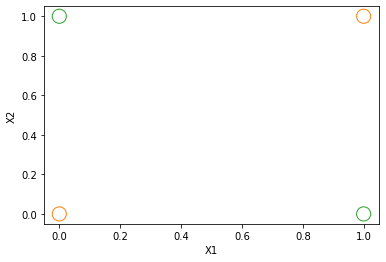

In [3]:
#=== data XOR
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([0,1,1,0])

nfeatures = x_train.shape[1] 
features = ['X1','X2']

colors_train=np.full(len(y_train), 'C1')     #color for training set
colors_train[np.where(y_train == 1)] = 'C2'   
plt.scatter(x_train[:,0], x_train[:,1], marker = 'o', s = 200,\
            facecolors='none',edgecolors=colors_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

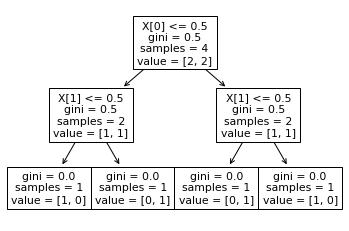

In [4]:
#======= a single tree: fully grown
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=False)
plt.show()

In [5]:
# predict
pred = clf.predict(x_train)
print(y_train.T, pred)
print('accuracy', clf.score(x_train,y_train))

[0 1 1 0] [0 1 1 0]
accuracy 1.0


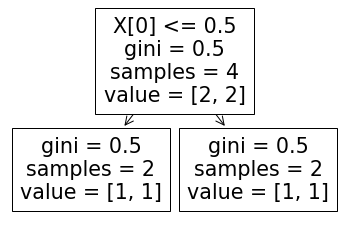

In [7]:
#======= a single tree: subjectively pruned
MAX_DEPTH = 1  #1, 2
MAX_LEAF_NODES = 2 # 2,3,4
clf = DecisionTreeClassifier(max_depth = MAX_DEPTH).fit(x_train, y_train)
#clf = DecisionTreeClassifier(max_leaf_nodes = MAX_LEAF_NODES).fit(x_train, y_train)

    #viz via sklearn
plot_tree(clf, filled = False)
plt.show()

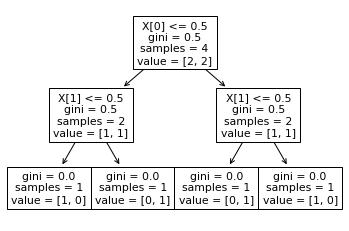

In [10]:
#======= a single tree: pruned via minimal cost-complexity pruning
clf = DecisionTreeClassifier(ccp_alpha = 0.16666666666).fit(x_train, y_train)
plot_tree(clf, filled=False)
plt.show()

In [11]:
#====== Bagging (Random Forest with m=p)
clf_bagging = RandomForestClassifier(max_features = nfeatures,\
                                     random_state = 1).fit(x_train, y_train)
pred = clf_bagging.predict(x_train)
print(y_train.T, pred)
print('accuracy', clf.score(x_train,y_train))

[0 1 1 0] [0 1 1 0]
accuracy 1.0


[0 1 1 0] [0 1 1 0]
accuracy 1.0


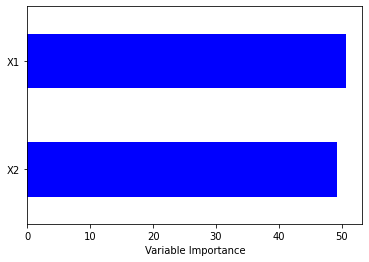

In [12]:
#========== Random forests: using int(sqrt(p)) +1 features
clf_rf= RandomForestClassifier(max_features = int(np.sqrt(nfeatures))+1,\
                                    random_state = 1).fit(x_train, y_train)
pred = clf_rf.predict(x_train)
print(y_train.T, pred)
print('accuracy', clf.score(x_train,y_train))

    #viz feature importance
pd.DataFrame({'Importance':clf_rf.feature_importances_*100}, \
             index = features).sort_values(by = 'Importance', \
             axis = 0, ascending = True).plot(kind = 'barh', 
                                              color = 'b', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [13]:
#========= Boosting
NTREES = 5000
INTERACTION_DEPTH = 4
SHRINKAGE_PARAM = 0.2 
clf_boosting = GradientBoostingClassifier(\
                        n_estimators = NTREES,\
                        learning_rate = SHRINKAGE_PARAM,\
                        max_depth = INTERACTION_DEPTH,\
                        random_state = 1).fit(x_train, y_train)

pred = clf_boosting.predict(x_train)
print(y_train.T, pred)
print('accuracy', clf.score(x_train,y_train))

[0 1 1 0] [0 1 1 0]
accuracy 1.0
